In [198]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt                               
import os 
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
matplotlib.rcParams["figure.dpi"] = 150
from particle import PDGID
from utils import delphesRootToPixelAvTrackList as utils

In [199]:
datadir = '/home/youeric/PixelSim/cmspix28-mc-sim/TestDataUnflippedVertexCut3'
flp = 0

In [200]:
import subprocess
import os

'''
def run_parquet_conversion(out_file_path, out_dir, tag):
    # Define the parquet command
    parquet_command = [
        "python3",
        "./processing/datagen.py",
        "-f", out_file_path,
        "-t", tag,
        "-d", out_dir
    ]
    
    # Run the parquet command
    subprocess.run(parquet_command)

if __name__ == "__main__":
    # Define the specific .out file and its details
    out_file_path = "/minbias_0.00_0.10_GeV.out"
    tag = "minbias_0.00_0.10_GeV"
    out_dir = os.path.abspath("./TestDataUnflippedVertexCut")
    
    # Run the parquet conversion
    run_parquet_conversion(out_file_path, out_dir, tag)
'''

'\ndef run_parquet_conversion(out_file_path, out_dir, tag):\n    # Define the parquet command\n    parquet_command = [\n        "python3",\n        "./processing/datagen.py",\n        "-f", out_file_path,\n        "-t", tag,\n        "-d", out_dir\n    ]\n    \n    # Run the parquet command\n    subprocess.run(parquet_command)\n\nif __name__ == "__main__":\n    # Define the specific .out file and its details\n    out_file_path = "/minbias_0.00_0.10_GeV.out"\n    tag = "minbias_0.00_0.10_GeV"\n    out_dir = os.path.abspath("./TestDataUnflippedVertexCut")\n    \n    # Run the parquet conversion\n    run_parquet_conversion(out_file_path, out_dir, tag)\n'

In [201]:
# Load the parquet file
data = pd.read_parquet(datadir+"/recon2Dminbias_0.00_0.50_GeV.parquet")

In [202]:
truthLow = pd.read_parquet(datadir+"/labelsminbias_0.00_0.50_GeV.parquet")    # file of id's
recon2DLow = pd.read_parquet(datadir+"/recon2Dminbias_0.00_0.50_GeV.parquet") # file of the tracks

Q = [] #add charge

for pid in truthLow['PID']:
    Q.append(PDGID(pid).charge)
truthLow['q'] = Q

# Seperate into positive and negative particles
cut = truthLow['q']>0
truthLowPos = truthLow[cut]
recon2DLowPos = recon2DLow[cut]
clustersLowPos = recon2DLowPos.to_numpy().reshape(recon2DLowPos.shape[0],13,21)

cut = truthLow['q']<0
truthLowNeg = truthLow[cut]
recon2DLowNeg = recon2DLow[cut]
clustersLowNeg = recon2DLowNeg.to_numpy().reshape(recon2DLowNeg.shape[0],13,21)

truthHigh = pd.read_parquet(datadir+"/labelsminbias_2.00_4.00_GeV.parquet")
recon2DHigh = pd.read_parquet(datadir+"/recon2Dminbias_2.00_4.00_GeV.parquet")
clustersHigh = recon2DHigh.to_numpy().reshape(recon2DHigh.shape[0],13,21)

Q = []
for pid in truthHigh['PID']:
    Q.append(PDGID(pid).charge)
truthHigh['q'] = Q

# Seperate into positive and negative particles
cut = truthHigh['q']>0
truthHighPos = truthHigh[cut]
recon2DHighPos = recon2DHigh[cut]
clustersHighPos = recon2DHighPos.to_numpy().reshape(recon2DHighPos.shape[0],13,21)

cut = truthHigh['q']<0
truthHighNeg = truthHigh[cut]
recon2DHighNeg = recon2DHigh[cut]
clustersLoHighNeg = recon2DHighNeg.to_numpy().reshape(recon2DHighNeg.shape[0],13,21)


In [203]:
def getProfiles(clusters):
    profiles = np.sum(clusters, axis = 2)
    totalCharge = np.sum(profiles, axis = 1, keepdims=True)
    return profiles/totalCharge

def getAverageProfile(clusters):
    profiles=getProfiles(clusters)
    return np.mean(profiles, axis=0)

In [204]:
def getClusterSizes(clusters):
    profiles=getProfiles(clusters)
    bool_arr = profiles != 0
    return np.sum(bool_arr, axis = 1)

def getAverageClusterSize(clusters):
    clusterSizes = getClusterSizes(clusters)
    return np.mean(clusterSizes)

In [205]:
# Seperate into out by ylocal
cut = truthLowPos['y-local']<-6

truthLowPos1 = truthLowPos[cut]
recon2DLowPos1 = recon2DLowPos[cut]
clustersLowPos1 = recon2DLowPos1.to_numpy().reshape(recon2DLowPos1.shape[0],13,21)

cut = truthLowNeg['y-local']<-6
truthLowNeg1 = truthLowNeg[cut]
recon2DLowNeg1 = recon2DLowNeg[cut]
clustersLowNeg1 = recon2DLowNeg1.to_numpy().reshape(recon2DLowNeg1.shape[0],13,21)

cut = truthHigh['y-local']<-6
truthHigh1 = truthHigh[cut]
recon2DHigh1 = recon2DHigh[cut]
clustersHigh1 = recon2DHigh1.to_numpy().reshape(recon2DHigh1.shape[0],13,21)

profileLowPos1 = getAverageProfile(clustersLowPos1)
profileLowNeg1 = getAverageProfile(clustersLowNeg1)
profileHigh1 = getAverageProfile(clustersHigh1)

In [206]:
clusterProfiles = getProfiles(clustersHigh1)

Test code on Profile low Cut

Covariance Matrix Shape: (13, 13)


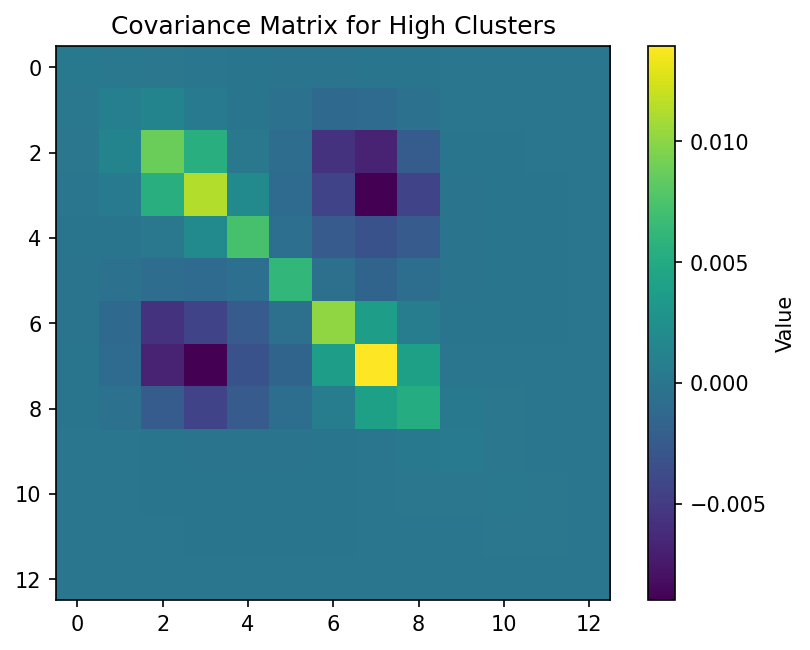

Covariance Matrix Shape: (13, 13)


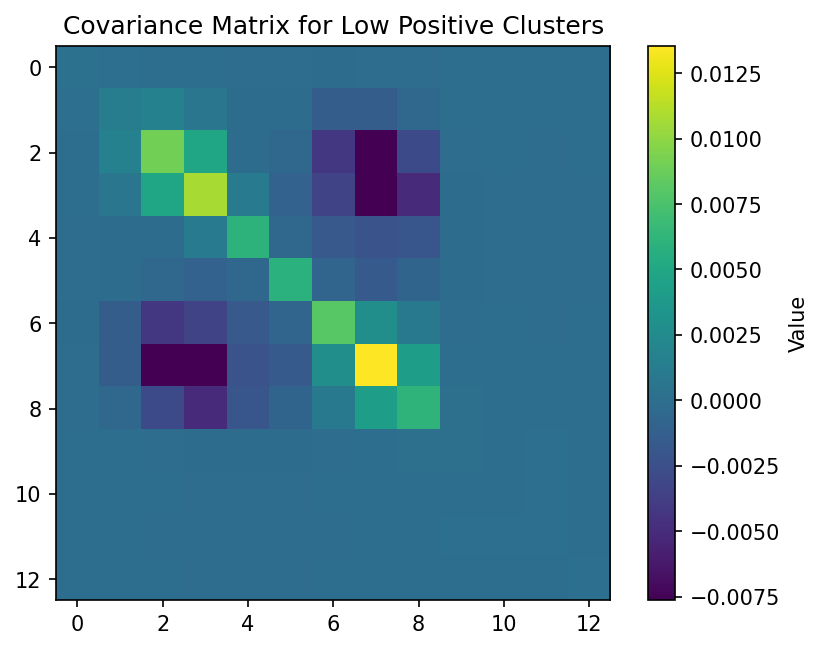

Covariance Matrix Shape: (13, 13)


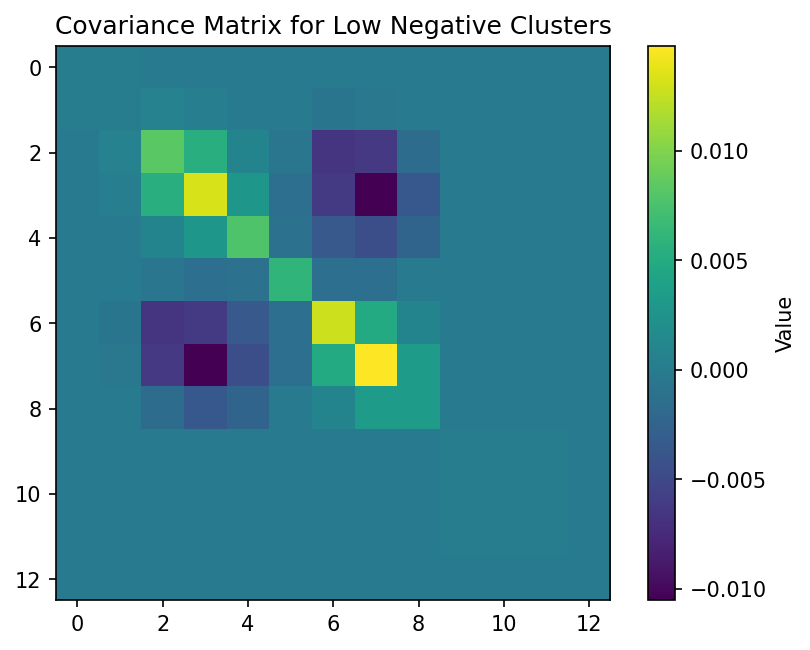

In [207]:
def GetMeanVector(clusters):
    clusterSizes = getAverageProfile(clusters)
    return np.mean(clusterSizes)

def getCovarianceMatrix(clusters):

    # Get the cluster size profile (non-zero pixels along axis 1 and 2 for each cluster)
    clusterProfiles = getProfiles(clusters)

    # Compute the covariance matrix
    covariance_matrix = np.cov(clusterProfiles, rowvar=False)
    
    return covariance_matrix

# Compute the covariance matrix for low-positive clusters
covariance_matrix_low_pos = getCovarianceMatrix(clustersHigh1)

# Print covariance matrix details
print("Covariance Matrix Shape:", covariance_matrix_low_pos.shape)

# Visualize with matplotlib
plt.imshow(covariance_matrix_low_pos, cmap='viridis')
plt.colorbar(label='Value')
plt.title('Covariance Matrix for High Clusters')
plt.show()

covariance_matrix = getCovarianceMatrix(clustersLowPos1)

# Print covariance matrix details
print("Covariance Matrix Shape:", covariance_matrix.shape)

# Visualize with matplotlib
plt.imshow(covariance_matrix, cmap='viridis')
plt.colorbar(label='Value')
plt.title('Covariance Matrix for Low Positive Clusters')
plt.show()

covariance_matrix = getCovarianceMatrix(clustersLowNeg1)

# Print covariance matrix details
print("Covariance Matrix Shape:", covariance_matrix.shape)

# Visualize with matplotlib
plt.imshow(covariance_matrix, cmap='viridis')
plt.colorbar(label='Value')
plt.title('Covariance Matrix for Low Negative Clusters')
plt.show()

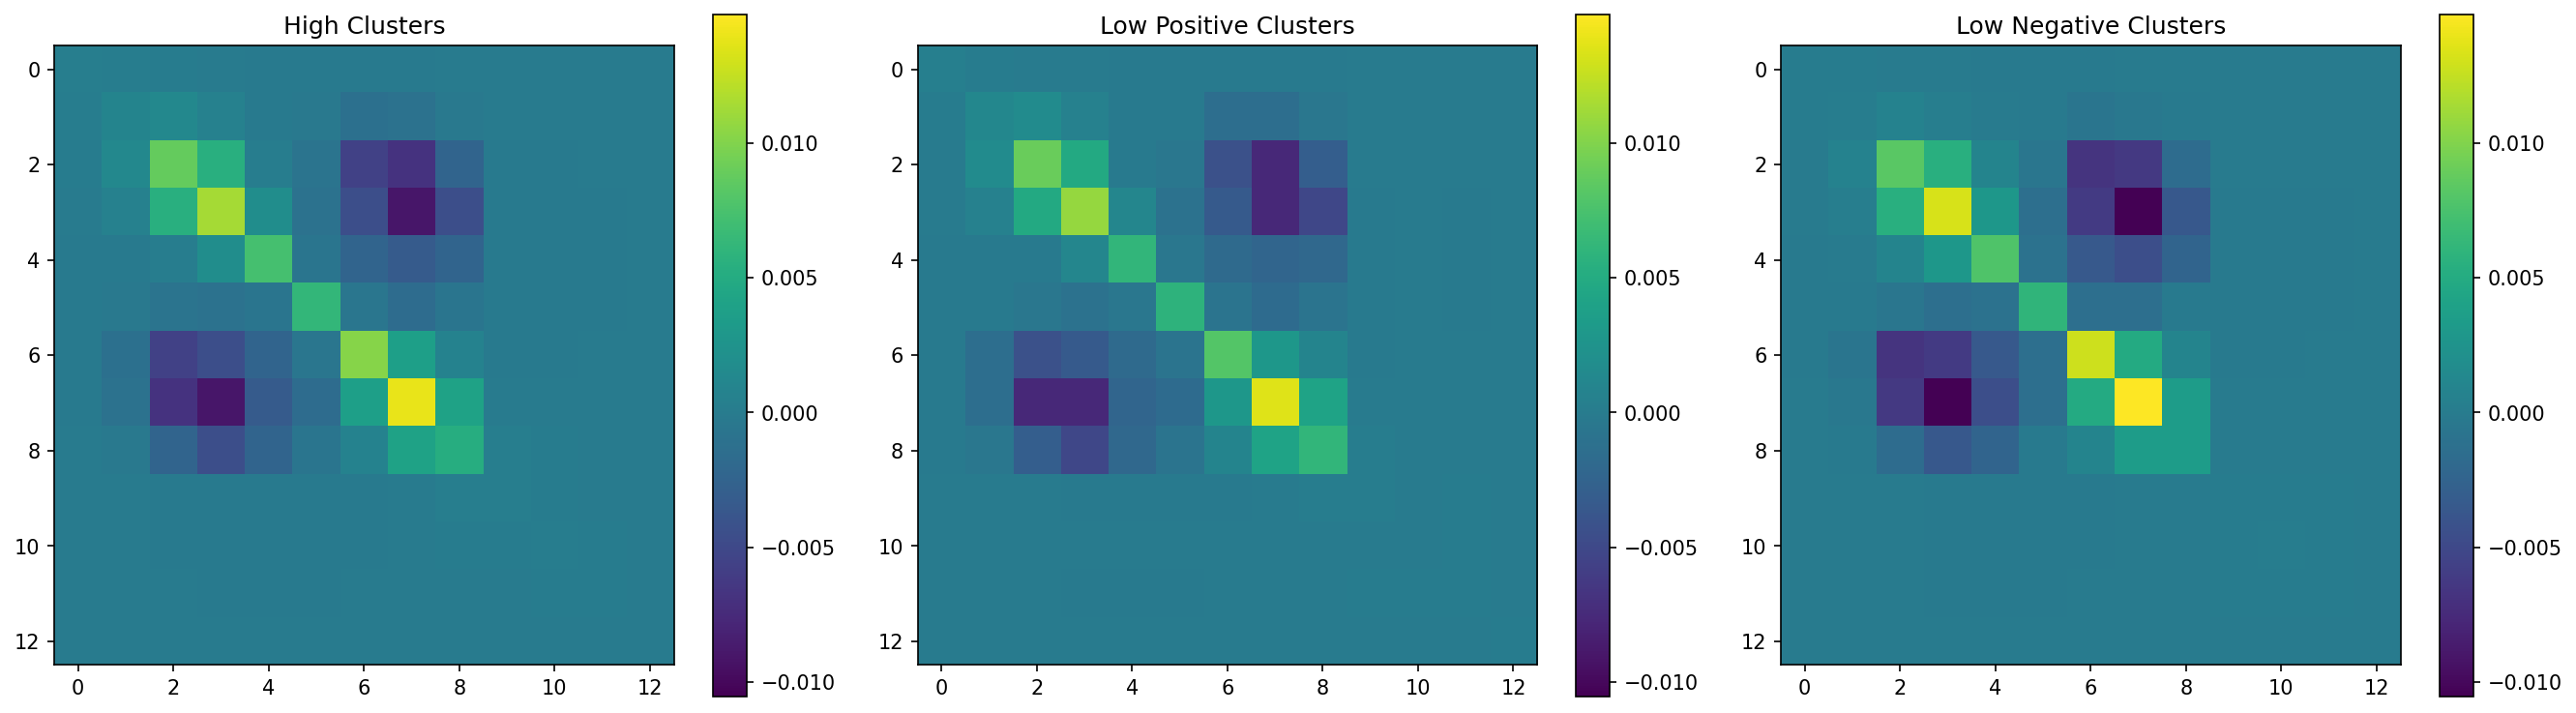

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the definitions for getClusterSizes and getProfiles already exist

def GetMeanVector(clusters):
    clusterSizes = getAverageProfile(clusters)
    return np.mean(clusterSizes)

def getCovarianceMatrix(clusters):
    # Get the cluster size profile (non-zero pixels along axis 1 and 2 for each cluster)
    clusterProfiles = getProfiles(clusters)
    # Compute the covariance matrix
    covariance_matrix = np.cov(clusterProfiles, rowvar=False)
    return covariance_matrix

# Compute covariance matrices for different clusters
covariance_matrix_high = getCovarianceMatrix(clustersHigh1)
covariance_matrix_low_pos = getCovarianceMatrix(clustersLowPos1)
covariance_matrix_low_neg = getCovarianceMatrix(clustersLowNeg1)

# Determine a common color scale
vmin = min(
    np.min(covariance_matrix_high),
    np.min(covariance_matrix_low_pos),
    np.min(covariance_matrix_low_neg),
)
vmax = max(
    np.max(covariance_matrix_high),
    np.max(covariance_matrix_low_pos),
    np.max(covariance_matrix_low_neg),
)

# Create a single figure with subplots for all three covariance matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# High Clusters
im1 = axes[0].imshow(covariance_matrix_high, cmap='viridis', vmin=vmin, vmax=vmax)
axes[0].set_title('High pT Clusters Covarience Matrix')
fig.colorbar(im1, ax=axes[0], orientation='vertical')

# Low Positive Clusters
im2 = axes[1].imshow(covariance_matrix_low_pos, cmap='viridis', vmin=vmin, vmax=vmax)
axes[1].set_title('Low pT Positive Clusters Covarience Matrix')
fig.colorbar(im2, ax=axes[1], orientation='vertical')

# Low Negative Clusters
im3 = axes[2].imshow(covariance_matrix_low_neg, cmap='viridis', vmin=vmin, vmax=vmax)
axes[2].set_title('Low pT Negative Clusters Covarience Matrix')
fig.colorbar(im3, ax=axes[2], orientation='vertical')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [209]:
import numpy as np

def Mahalanobis_Distance(cov_matrix, mean_vector, random_vector):
    """
    Compute the Mahalanobis distance using the pseudoinverse for singular covariance matrices.

    Parameters:
        cov_matrix (numpy.ndarray): Covariance matrix of the distribution (shape: n x n).
        mean_vector (numpy.ndarray): Mean vector of the distribution (shape: n,).
        random_vector (numpy.ndarray): Input random vector (shape: n,).

    Returns:
        float: The Mahalanobis distance.
    """
    # Convert inputs to numpy arrays if they are not already
    cov_matrix = np.asarray(cov_matrix)
    mean_vector = np.asarray(mean_vector)
    random_vector = np.asarray(random_vector)

    # Ensure the dimensions match
    if mean_vector.shape[0] != random_vector.shape[0]:
        raise ValueError("Mean vector and random vector dimensions do not match.")
    if cov_matrix.shape[0] != cov_matrix.shape[1] or cov_matrix.shape[0] != mean_vector.shape[0]:
        raise ValueError("Covariance matrix dimensions must match the length of the mean vector.")
    
    # Compute the difference vector
    diff = random_vector - mean_vector

    # Compute the pseudoinverse of the covariance matrix
    inv_cov_matrix = np.linalg.pinv(cov_matrix)
    
    # Compute Mahalanobis distance
    distance = np.sqrt(np.dot(np.dot(diff.T, inv_cov_matrix), diff))
    return distance


# Assume clustersLowPos1 is your dataset
cov_matrix = getCovarianceMatrix(clustersLowPos1)
mean_vector = getAverageProfile(clustersLowPos1).flatten()

# Random vector to test (same length as mean_vector)
random_vector = np.random.rand(mean_vector.shape[0])

# Compute the Mahalanobis distance
distance = Mahalanobis_Distance(cov_matrix, mean_vector, random_vector)

print("Mahalanobis Distance:", distance)

Mahalanobis Distance: 52.70163228961717


The sample mean and covariance matrix can be quite sensitive to outliers, therefore other approaches for calculating the multivariate location and scatter of data are also commonly used when calculating the Mahalanobis distance. The Minimum Covariance Determinant approach estimates multivariate location and scatter from a subset numbering 
h
{\displaystyle h} data points that has the smallest variance-covariance matrix determinant.[9] The Minimum Volume Ellipsoid approach is similar to the Minimum Covariance Determinant approach in that it works with a subset of size 
h
{\displaystyle h} data points, but the Minimum Volume Ellipsoid estimates multivariate location and scatter from the ellipsoid of minimal volume that encapsulates the 
h
{\displaystyle h} data points.

In [210]:
from scipy.stats import chi2

def Mahalanobis_Probability(D_M, d):
    """
    Compute the probability (p-value) that a vector belongs to a given distribution.

    Parameters:
        D_M (float): Mahalanobis distance.
        d (int): Degrees of freedom (dimensionality of the vector).

    Returns:
        float: Probability that the vector belongs to the distribution.
    """
    # Compute the squared Mahalanobis distance
    D_M_squared = D_M ** 2
    
    # Compute the cumulative distribution function (CDF) for chi-squared distribution
    chi2_cdf = chi2.cdf(D_M_squared, df=d)
    
    # Compute the probability (p-value)
    p_value = 1 - chi2_cdf
    
    return p_value


In [211]:
# Assume clustersLowPos1 is your dataset
cov_matrix = getCovarianceMatrix(clustersHigh1)
mean_vector = getAverageProfile(clustersHigh1).flatten()

# Random vector to test (same length as mean_vector)
random_vector = np.random.rand(mean_vector.shape[0])

# Compute the Mahalanobis distance
distance = Mahalanobis_Distance(cov_matrix, mean_vector, random_vector)

print(Mahalanobis_Probability(distance, mean_vector.shape[0]))
# At least it works

0.0


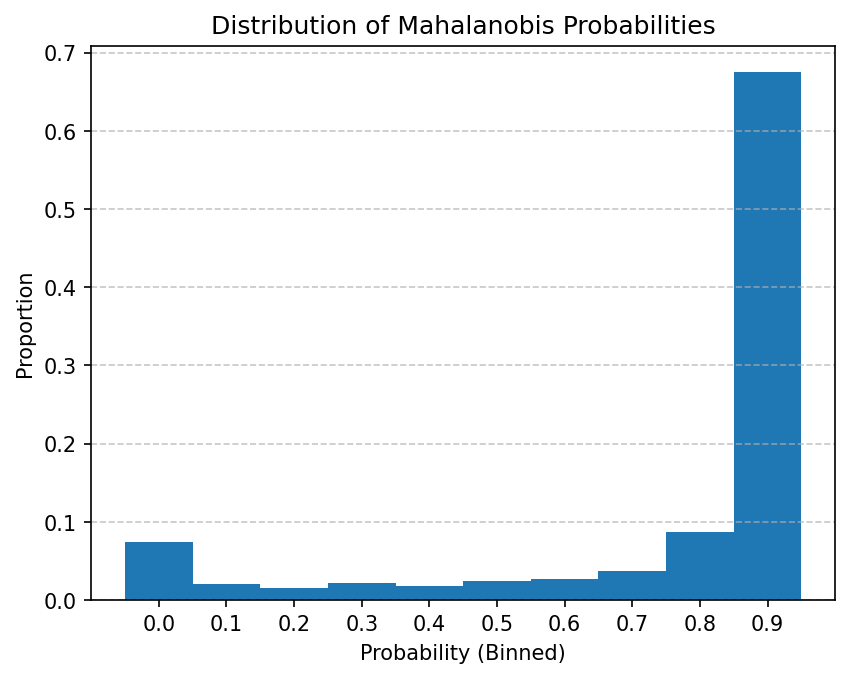

In [212]:
import matplotlib.pyplot as plt
from collections import Counter

cov_matrix = getCovarianceMatrix(clustersHigh1)
mean_vector = getAverageProfile(clustersHigh1).flatten()
clusterProfiles = getProfiles(clustersHigh1)

# Iterate through clusterProfiles to compute Mahalanobis probabilities
probabilities = []

for profile in clusterProfiles:
    # Set the random vector as the current profile
    random_vector = profile
    
    # Compute the Mahalanobis distance
    distance = Mahalanobis_Distance(cov_matrix, mean_vector, random_vector)
    
    # Compute the probability
    prob = Mahalanobis_Probability(distance, mean_vector.shape[0])
    probabilities.append(prob)

# Bin the probabilities into discrete ranges for plotting
binned_probs = Counter((int(p * 10) / 10 for p in probabilities))  # Binning into 0.1 intervals

# Normalize the counts to compute proportions
total_profiles = sum(binned_probs.values())
bins = sorted(binned_probs.keys())
proportions = [binned_probs[b] / total_profiles for b in bins]

# Plot the bar graph
plt.bar(bins, proportions, width=0.1, align='center')
plt.xlabel("Probability (Binned)")
plt.ylabel("Proportion")
plt.title("Distribution of Mahalanobis Probabilities")
plt.xticks(bins)  # Set x-ticks to show each bin
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


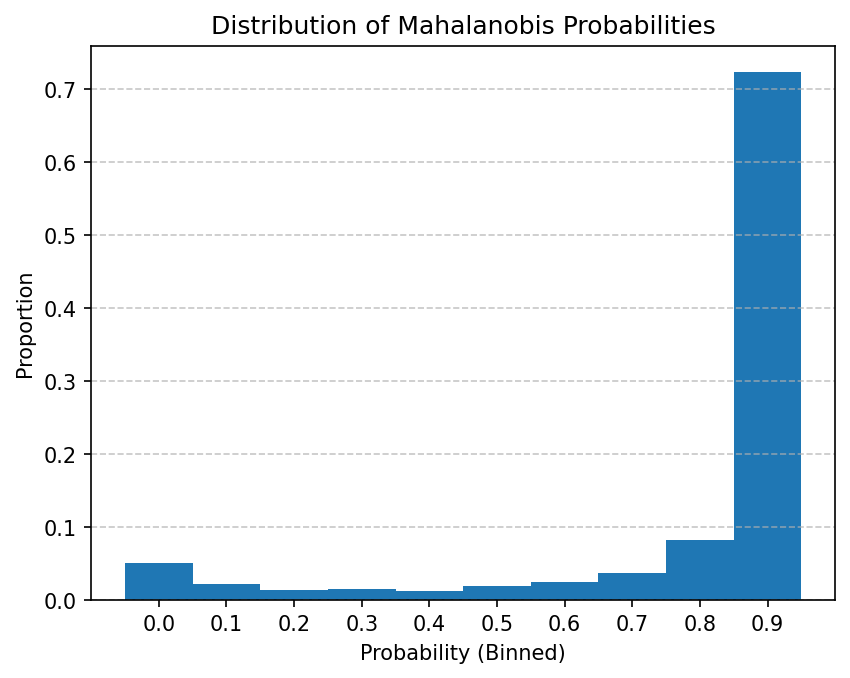

In [213]:
import matplotlib.pyplot as plt
from collections import Counter

clusterProfiles = getProfiles(clustersLowNeg1)

# Iterate through clusterProfiles to compute Mahalanobis probabilities
probabilities = []

for profile in clusterProfiles:
    # Set the random vector as the current profile
    random_vector = profile
    
    # Compute the Mahalanobis distance
    distance = Mahalanobis_Distance(cov_matrix, mean_vector, random_vector)
    
    # Compute the probability
    prob = Mahalanobis_Probability(distance, mean_vector.shape[0])
    probabilities.append(prob)

# Bin the probabilities into discrete ranges for plotting
binned_probs = Counter((int(p * 10) / 10 for p in probabilities))  # Binning into 0.1 intervals

# Normalize the counts to compute proportions
total_profiles = sum(binned_probs.values())
bins = sorted(binned_probs.keys())
proportions = [binned_probs[b] / total_profiles for b in bins]

# Plot the bar graph
plt.bar(bins, proportions, width=0.1, align='center')
plt.xlabel("Probability (Binned)")
plt.ylabel("Proportion")
plt.title("Distribution of Mahalanobis Probabilities")
plt.xticks(bins)  # Set x-ticks to show each bin
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


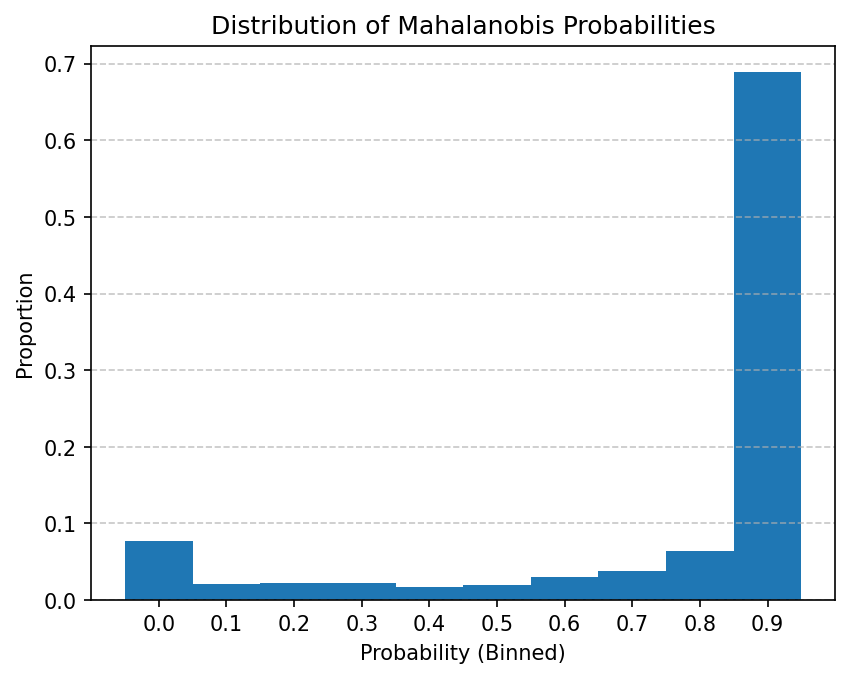

In [214]:
import matplotlib.pyplot as plt
from collections import Counter

clusterProfiles = getProfiles(clustersLowPos1)

# Iterate through clusterProfiles to compute Mahalanobis probabilities
probabilities = []

for profile in clusterProfiles:
    # Set the random vector as the current profile
    random_vector = profile
    
    # Compute the Mahalanobis distance
    distance = Mahalanobis_Distance(cov_matrix, mean_vector, random_vector)
    
    # Compute the probability
    prob = Mahalanobis_Probability(distance, mean_vector.shape[0])
    probabilities.append(prob)

# Bin the probabilities into discrete ranges for plotting
binned_probs = Counter((int(p * 10) / 10 for p in probabilities))  # Binning into 0.1 intervals

# Normalize the counts to compute proportions
total_profiles = sum(binned_probs.values())
bins = sorted(binned_probs.keys())
proportions = [binned_probs[b] / total_profiles for b in bins]

# Plot the bar graph
plt.bar(bins, proportions, width=0.1, align='center')
plt.xlabel("Probability (Binned)")
plt.ylabel("Proportion")
plt.title("Distribution of Mahalanobis Probabilities")
plt.xticks(bins)  # Set x-ticks to show each bin
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

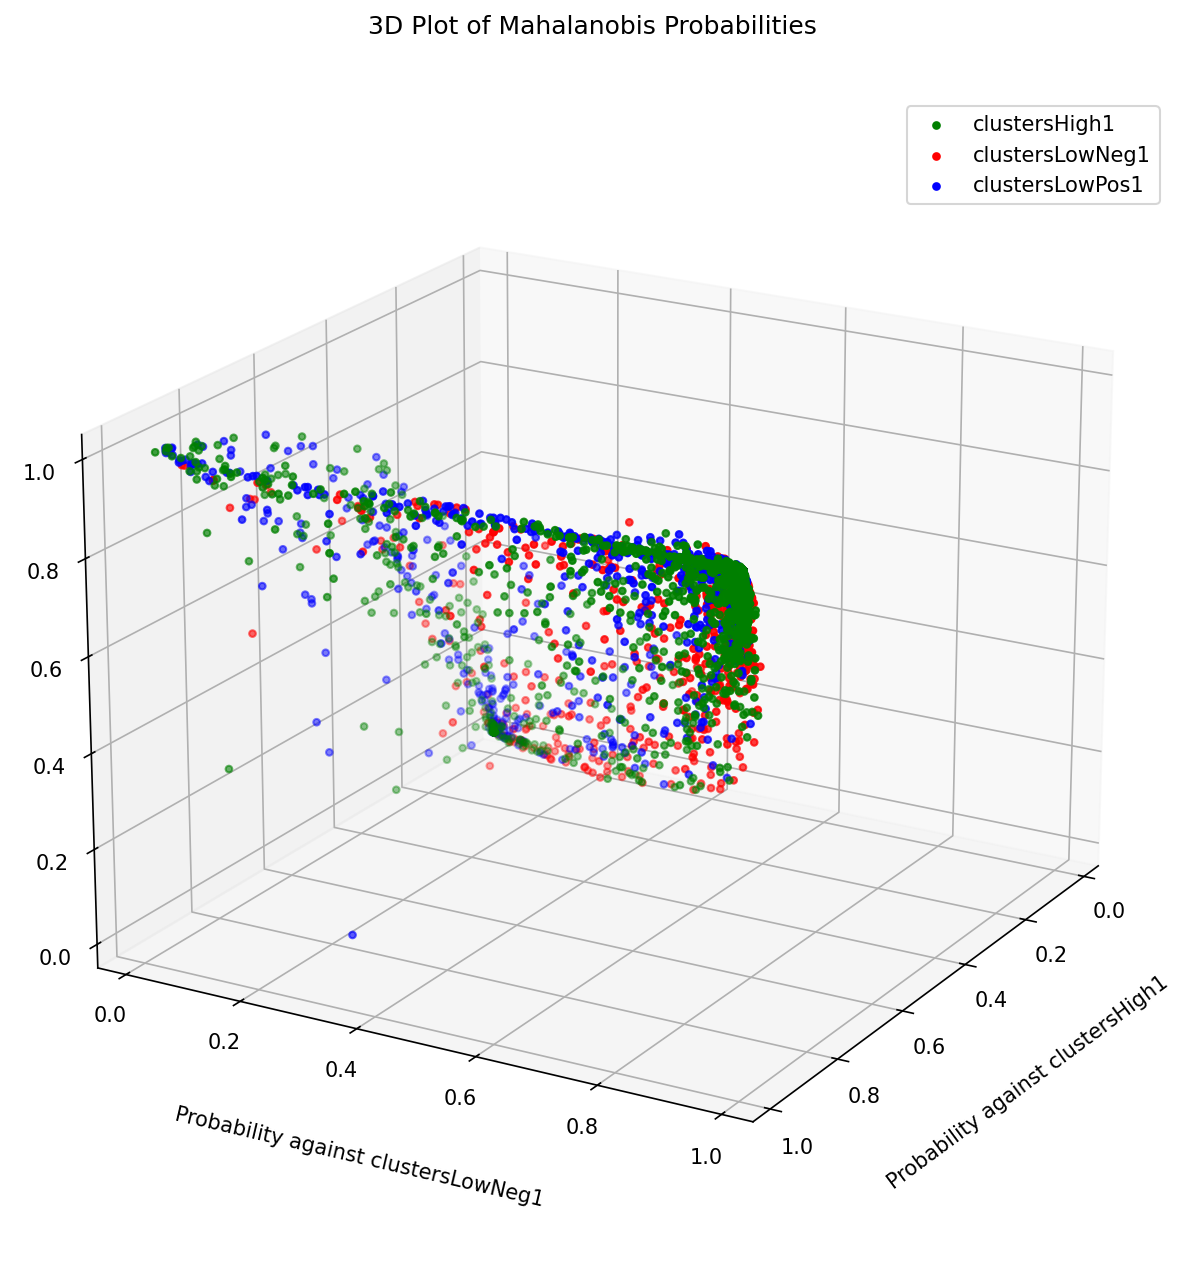

In [215]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to compute Mahalanobis probabilities
def compute_probabilities(dataset, reference_datasets):
    """
    Compute probabilities for each profile in a dataset against all reference datasets.

    Parameters:
        dataset: The dataset to process (e.g., clustersHigh1).
        reference_datasets: List of reference datasets for covariance and mean.

    Returns:
        List of lists containing probabilities for the dataset against each reference.
    """
    probabilities = []
    for ref_dataset in reference_datasets:
        probs = []
        for profile in getProfiles(dataset):
            distance = Mahalanobis_Distance(
                getCovarianceMatrix(ref_dataset),
                getAverageProfile(ref_dataset).flatten(),
                profile
            )
            prob = Mahalanobis_Probability(distance, getAverageProfile(ref_dataset).shape[0])
            probs.append(prob)
        probabilities.append(probs)
    return probabilities

# Define all datasets
datasets = [clustersHigh1, clustersLowNeg1, clustersLowPos1]
dataset_labels = ['clustersHigh1', 'clustersLowNeg1', 'clustersLowPos1']
dataset_colors = ['green', 'red', 'blue']  # Colors for each dataset

# Compute probabilities for all datasets
all_probabilities = {}
for idx, dataset in enumerate(datasets):
    dataset_name = dataset_labels[idx]  # Assign name based on the dataset
    all_probabilities[dataset_name] = compute_probabilities(dataset, datasets)

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each dataset with different colors
for idx, dataset_name in enumerate(dataset_labels):
    # Extract probabilities for the current dataset
    probs_high = all_probabilities[dataset_name][0]
    probs_low_neg = all_probabilities[dataset_name][1]
    probs_low_pos = all_probabilities[dataset_name][2]

    # Scatter probabilities in 3D
    ax.scatter(probs_high, probs_low_neg, probs_low_pos, 
               c=dataset_colors[idx], marker='o', s=10, 
               label=f'{dataset_name}')

# Label axes
ax.set_xlabel('Probability against clustersHigh1', labelpad=20)
ax.set_ylabel('Probability against clustersLowNeg1', labelpad=20)
ax.set_zlabel('Probability against clustersLowPos1', labelpad=20)
ax.set_title('3D Plot of Mahalanobis Probabilities', pad=30)

# Set axis limits
padding = 0.05
ax.set_xlim(0 - padding, 1 + padding)
ax.set_ylim(0 - padding, 1 + padding)
ax.set_zlim(0 - padding, 1 + padding)

# Adjust camera view
ax.view_init(elev=20, azim=30)

# Add legend
ax.legend(loc='best')

# Show plot
plt.show()


In [216]:
import plotly.graph_objects as go
import numpy as np

# Create scatter plot
fig = go.Figure()

# Add data for clustersHigh1
fig.add_trace(go.Scatter3d(
    x=probs_high, y=probs_low_neg, z=probs_low_pos,
    mode='markers',
    marker=dict(size=5, color='green'),
    name='clustersHigh1'
))

# Add data for clustersLowNeg1
fig.add_trace(go.Scatter3d(
    x=probs_low_neg, y=probs_high, z=probs_low_pos,
    mode='markers',
    marker=dict(size=5, color='red'),
    name='clustersLowNeg1'
))

# Add data for clustersLowPos1
fig.add_trace(go.Scatter3d(
    x=probs_low_pos, y=probs_low_neg, z=probs_high,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='clustersLowPos1'
))

# Update layout with larger size
fig.update_layout(
    scene=dict(
        xaxis_title='Probability against clustersHigh1',
        yaxis_title='Probability against clustersLowNeg1',
        zaxis_title='Probability against clustersLowPos1'
    ),
    title='Interactive 3D Plot of Mahalanobis Probabilities',
    margin=dict(l=0, r=0, b=0, t=40),
    width=1200,  # Set width of the figure
    height=900   # Set height of the figure
)

# Show plot
fig.show()

fig.write_html("interactive_plot.html")



/tmp/ipykernel_2635124/1926162012.py:43: RuntimeWarning:

invalid value encountered in divide



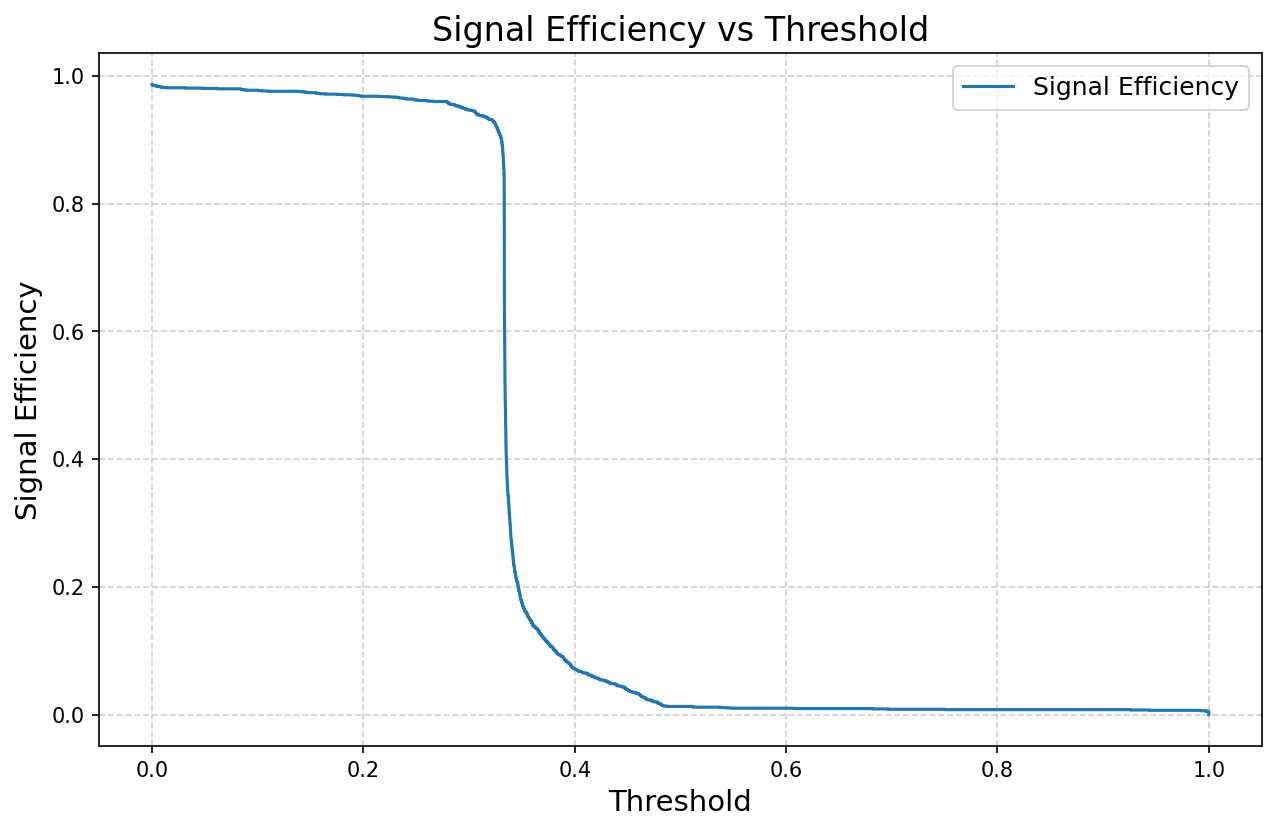

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Compute probabilities for clustersHigh1 under all covariance matrices
probs_high = []
probs_low_neg = []
probs_low_pos = []

# Compute probabilities for clustersHigh1 under clustersHigh1
for profile in getProfiles(clustersHigh1):
    distance_high = Mahalanobis_Distance(
        getCovarianceMatrix(clustersHigh1),
        getAverageProfile(clustersHigh1).flatten(),
        profile
    )
    prob_high = Mahalanobis_Probability(distance_high, getAverageProfile(clustersHigh1).shape[0])
    probs_high.append(prob_high)

    # Compute probabilities for clustersHigh1 under clustersLowNeg1
    distance_low_neg = Mahalanobis_Distance(
        getCovarianceMatrix(clustersLowNeg1),
        getAverageProfile(clustersLowNeg1).flatten(),
        profile
    )
    prob_low_neg = Mahalanobis_Probability(distance_low_neg, getAverageProfile(clustersLowNeg1).shape[0])
    probs_low_neg.append(prob_low_neg)

    # Compute probabilities for clustersHigh1 under clustersLowPos1
    distance_low_pos = Mahalanobis_Distance(
        getCovarianceMatrix(clustersLowPos1),
        getAverageProfile(clustersLowPos1).flatten(),
        profile
    )
    prob_low_pos = Mahalanobis_Probability(distance_low_pos, getAverageProfile(clustersLowPos1).shape[0])
    probs_low_pos.append(prob_low_pos)

# Convert lists to NumPy arrays for easier computation
probs_high = np.array(probs_high)
probs_low_neg = np.array(probs_low_neg)
probs_low_pos = np.array(probs_low_pos)

# Step 2: Compute the ratio for each cluster
ratios = probs_high / (probs_high + probs_low_neg + probs_low_pos)

# Step 3: Define thresholds and compute signal efficiency
thresholds = np.linspace(0, 1, 100000)  # 100 values between 0 and 1
signal_efficiency = []
signal_remaining = []

for threshold in thresholds:
    # Compute the proportion of clustersHigh1 that remain
    remaining_clusters = np.sum(ratios > threshold)
    efficiency = remaining_clusters / len(clustersHigh1)
    signal_efficiency.append(efficiency)

# Make false positive rate here
for threshold in thresholds:
    # Compute the proportion of clustersHigh1 that remain
    remaining_clusters = np.sum(ratios > threshold)
    remaining = (len(clustersHigh1) - remaining_clusters) / len(clustersHigh1)
    signal_remaining.append(remaining)

# Step 4: Plot signal efficiency vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, signal_efficiency, label="Signal Efficiency")
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("Signal Efficiency", fontsize=14)
plt.title("Signal Efficiency vs Threshold", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


/tmp/ipykernel_2635124/4178964777.py:48: RuntimeWarning:

invalid value encountered in divide



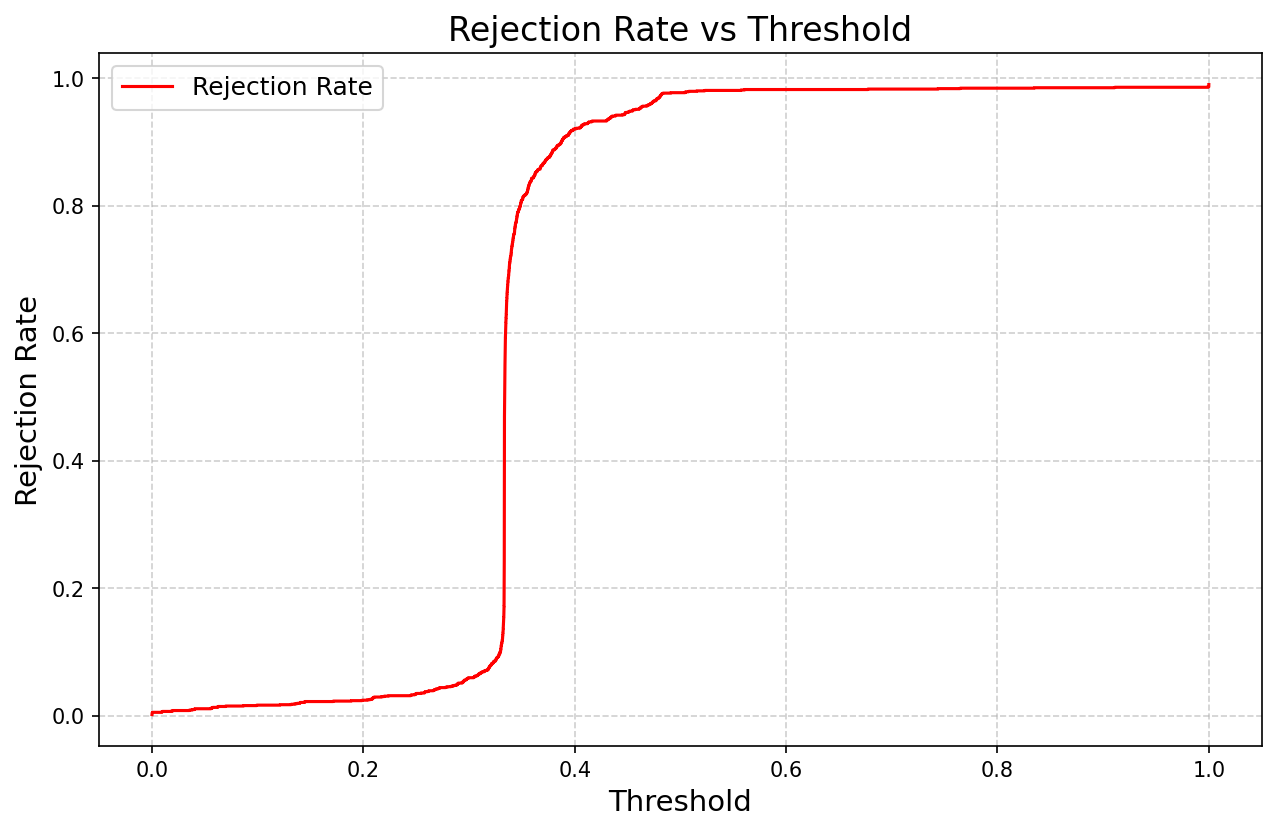

In [218]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Combine clustersLowNeg1 and clustersLowPos1 into a background dataset
# background_clusters = np.concatenate((clustersLowNeg1, clustersLowPos1), axis=0)
background_clusters = clustersLowPos1

# Step 2: Compute probabilities for the background dataset under all covariance matrices
probs_high_bg = []
probs_low_neg_bg = []
probs_low_pos_bg = []

# Compute probabilities for the background dataset
for profile in getProfiles(background_clusters):
    # Probability under clustersHigh1
    distance_high = Mahalanobis_Distance(
        getCovarianceMatrix(clustersHigh1),
        getAverageProfile(clustersHigh1).flatten(),
        profile
    )
    prob_high = Mahalanobis_Probability(distance_high, getAverageProfile(clustersHigh1).shape[0])
    probs_high_bg.append(prob_high)

    # Probability under clustersLowNeg1
    distance_low_neg = Mahalanobis_Distance(
        getCovarianceMatrix(clustersLowNeg1),
        getAverageProfile(clustersLowNeg1).flatten(),
        profile
    )
    prob_low_neg = Mahalanobis_Probability(distance_low_neg, getAverageProfile(clustersLowNeg1).shape[0])
    probs_low_neg_bg.append(prob_low_neg)

    # Probability under clustersLowPos1
    distance_low_pos = Mahalanobis_Distance(
        getCovarianceMatrix(clustersLowPos1),
        getAverageProfile(clustersLowPos1).flatten(),
        profile
    )
    prob_low_pos = Mahalanobis_Probability(distance_low_pos, getAverageProfile(clustersLowPos1).shape[0])
    probs_low_pos_bg.append(prob_low_pos)

# Convert lists to NumPy arrays
probs_high_bg = np.array(probs_high_bg)
probs_low_neg_bg = np.array(probs_low_neg_bg)
probs_low_pos_bg = np.array(probs_low_pos_bg)

# Step 3: Compute the ratio for the background dataset
ratios_bg = probs_high_bg / (probs_high_bg + probs_low_neg_bg + probs_low_pos_bg)

# Step 4: Define thresholds and compute rejection rate
thresholds = np.linspace(0, 1, 100000) 
rejection_rate = []

for threshold in thresholds:
    # Compute the proportion of background clusters rejected
    rejected_clusters = np.sum(ratios_bg <= threshold) # Changed This
    rejection = rejected_clusters / len(background_clusters)
    rejection_rate.append(rejection)

# Step 5: Plot rejection rate vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rejection_rate, label="Rejection Rate", color="red")
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("Rejection Rate", fontsize=14)
plt.title("Rejection Rate vs Threshold", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


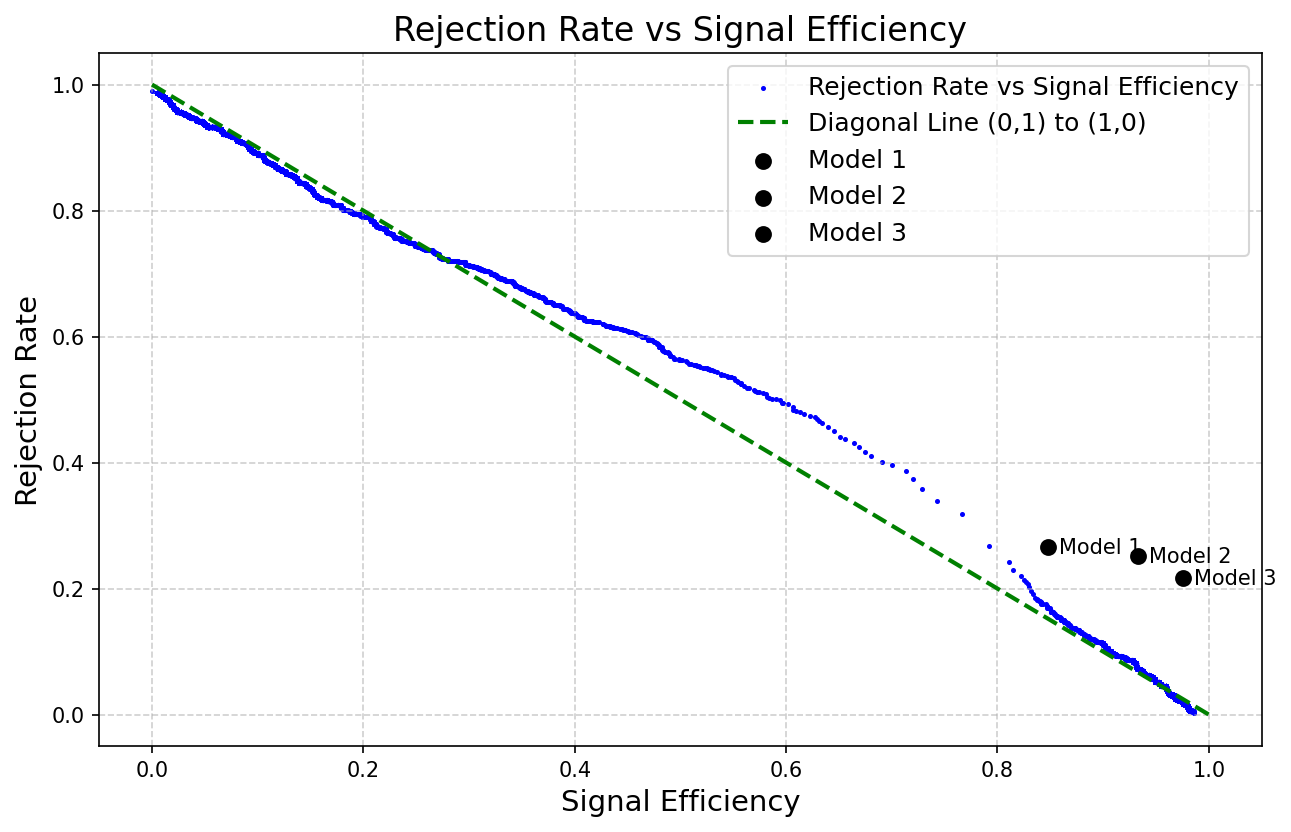

In [219]:
import matplotlib.pyplot as plt
import numpy as np

signal_efficiency = np.array(signal_efficiency)  # Convert to NumPy array
rejection_rate = np.array(rejection_rate)  # Ensure rejection_rate is a NumPy array

# Points from the table
table_points = {
    "Model 1": {"sig_eff": 84.8 / 100, "bkg_rej": 26.6 / 100},
    "Model 2": {"sig_eff": 93.3 / 100, "bkg_rej": 25.1 / 100},
    "Model 3": {"sig_eff": 97.6 / 100, "bkg_rej": 21.7 / 100},
}

# Plot Rejection Rate vs Signal Efficiency
plt.figure(figsize=(10, 6))
plt.scatter(signal_efficiency, rejection_rate, label="Rejection Rate vs Signal Efficiency", color="blue", s=2)

# Plot diagonal line from (0, 1) to (1, 0)
plt.plot([0, 1], [1, 0], color="green", linestyle="--", label="Diagonal Line (0,1) to (1,0)", linewidth=2)

# Plot and annotate points from the table
for model, coords in table_points.items():
    plt.scatter(coords["sig_eff"], coords["bkg_rej"], color="black", s=50, zorder=5, label=model)
    plt.text(coords["sig_eff"] + 0.01, coords["bkg_rej"] - 0.01, model, fontsize=10)

# Labels and title
plt.xlabel("Signal Efficiency", fontsize=14)
plt.ylabel("Rejection Rate", fontsize=14)
plt.title("Rejection Rate vs Signal Efficiency", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc="upper right")
plt.show()



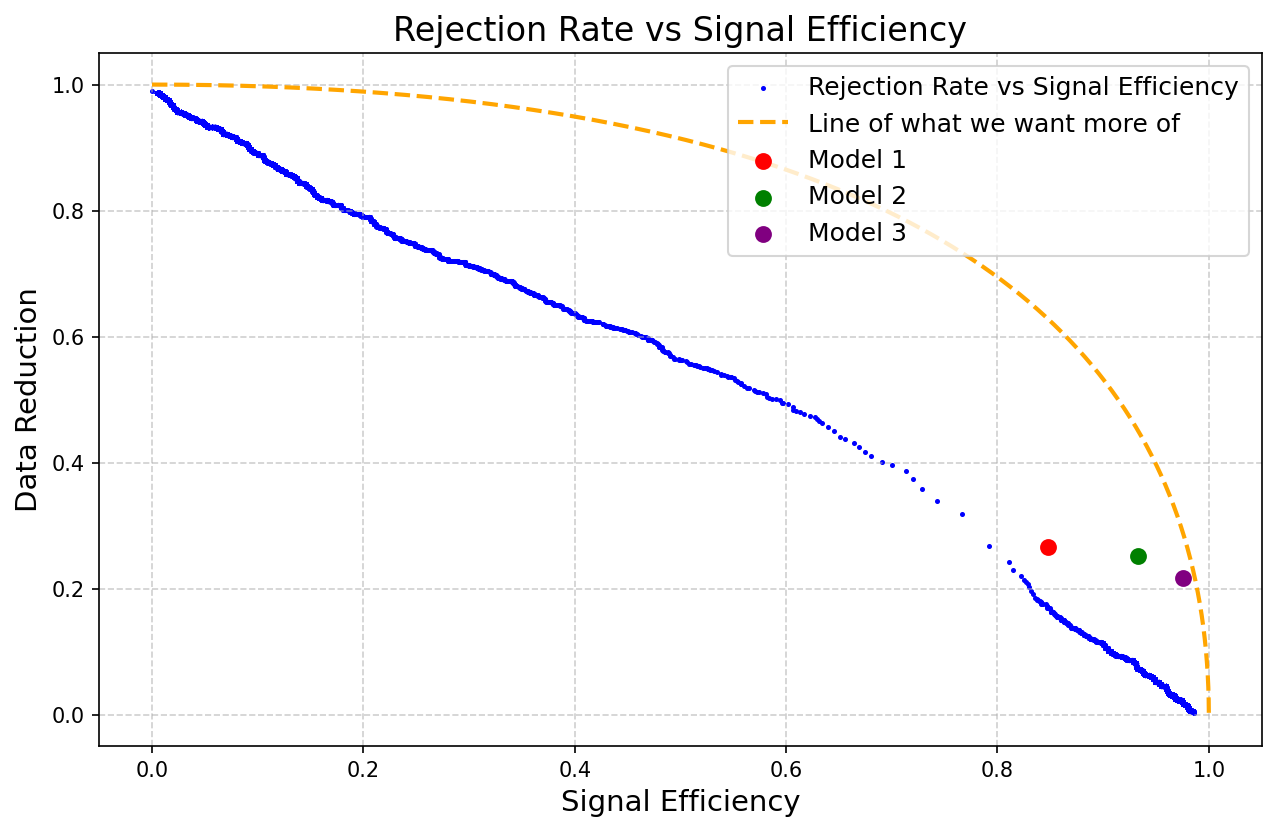

In [220]:
import matplotlib.pyplot as plt
import numpy as np

# Convert signal_efficiency and rejection_rate to NumPy arrays if needed
signal_efficiency = np.array(signal_efficiency)
rejection_rate = np.array(rejection_rate)

# Points from the table
table_points = {
    "Model 1": {"sig_eff": 84.8 / 100, "bkg_rej": 26.6 / 100, "color": "red"},
    "Model 2": {"sig_eff": 93.3 / 100, "bkg_rej": 25.1 / 100, "color": "green"},
    "Model 3": {"sig_eff": 97.6 / 100, "bkg_rej": 21.7 / 100, "color": "purple"},
}

# Bézier curve control points
start_point = (0, 1)
control_point = (1, 1)  # Adjust this to make the curve bulge towards upper-right
end_point = (1, 0)

# Generate a Bézier curve using the parametric formula
t = np.linspace(0, 1, 500)  # Parameter from 0 to 1
curve_x = (1 - t)**2 * start_point[0] + 2 * (1 - t) * t * control_point[0] + t**2 * end_point[0]
curve_y = (1 - t)**2 * start_point[1] + 2 * (1 - t) * t * control_point[1] + t**2 * end_point[1]

# Plot Rejection Rate vs Signal Efficiency
plt.figure(figsize=(10, 6))
plt.scatter(signal_efficiency, rejection_rate, label="Rejection Rate vs Signal Efficiency", color="blue", s=2)

# Plot the curved line
plt.plot(curve_x, curve_y, color="orange", linestyle="--", label="Line of what we want more of", linewidth=2)

# Plot and differentiate points from the table
for model, coords in table_points.items():
    plt.scatter(coords["sig_eff"], coords["bkg_rej"], color=coords["color"], s=50, zorder=5, label=model)

# Labels and title
plt.xlabel("Signal Efficiency", fontsize=14)
plt.ylabel("Data Reduction", fontsize=14)
plt.title("Rejection Rate vs Signal Efficiency", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc="upper right")
plt.show()


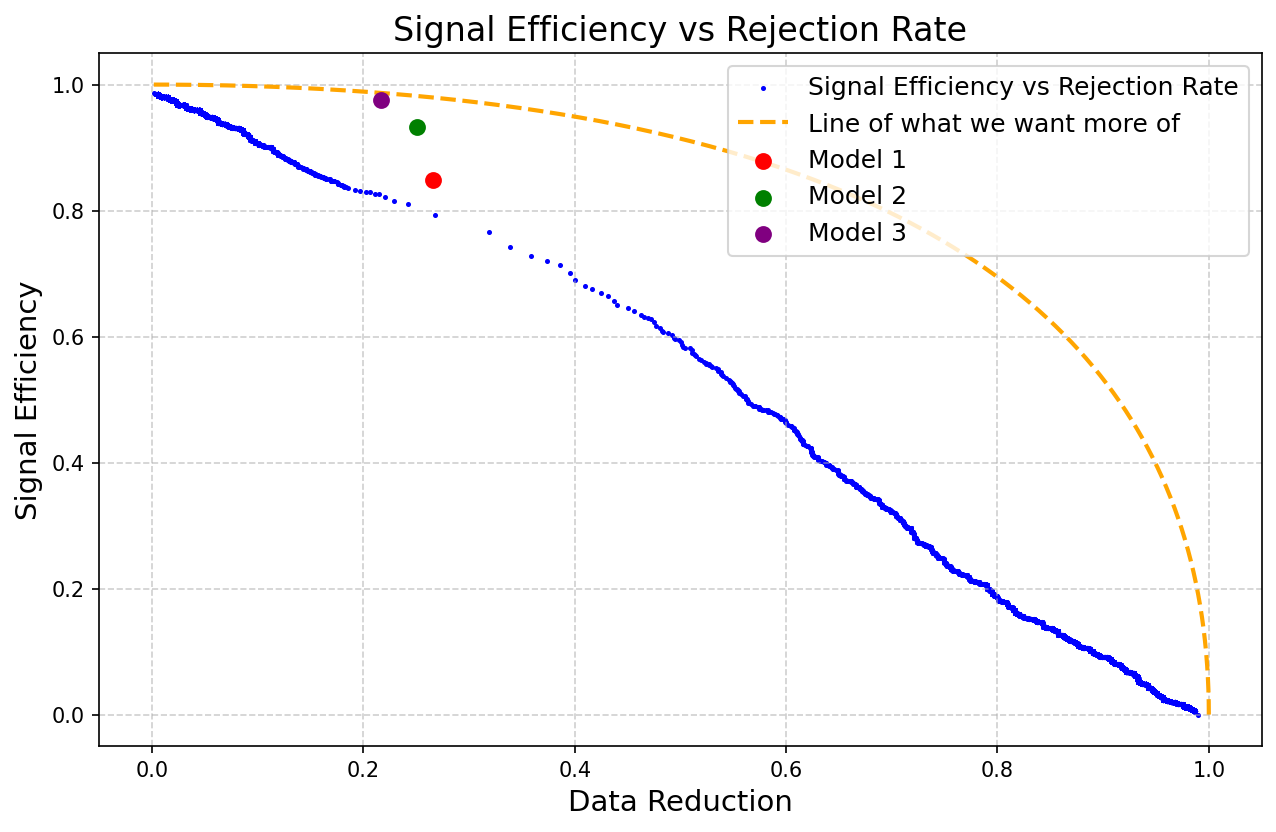

In [ ]:
# Plot Signal Efficiency vs Rejection Rate
plt.figure(figsize=(10, 6))
plt.scatter(rejection_rate, signal_efficiency, label="Signal Efficiency vs Rejection Rate (Hadron Case)", color="blue", s=2)

# Plot the curved line
plt.plot(curve_y, curve_x, color="orange", linestyle="--", label="Line of what we want more of", linewidth=2)

# Plot and differentiate points from the table
for model, coords in table_points.items():
    plt.scatter(coords["bkg_rej"], coords["sig_eff"], color=coords["color"], s=50, zorder=5, label=model)

# Labels and title
plt.xlabel("Data Reduction", fontsize=14)  # X-axis is now Rejection Rate
plt.ylabel("Signal Efficiency", fontsize=14)  # Y-axis is now Signal Efficiency
plt.title("Signal Efficiency vs Rejection Rate", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc="upper right")
plt.show()

In [222]:
# Seperate into out by ylocal
cut = truthLowPos['y-local']>6

truthLowPos2 = truthLowPos[cut]
recon2DLowPos2 = recon2DLowPos[cut]
clustersLowPos2 = recon2DLowPos2.to_numpy().reshape(recon2DLowPos2.shape[0],13,21)

cut = truthLowNeg['y-local']>6
truthLowNeg2 = truthLowNeg[cut]
recon2DLowNeg2 = recon2DLowNeg[cut]
clustersLowNeg2 = recon2DLowNeg2.to_numpy().reshape(recon2DLowNeg2.shape[0],13,21)

cut = truthHigh['y-local']>6
truthHigh2 = truthHigh[cut]
recon2DHigh2 = recon2DHigh[cut]
clustersHigh2 = recon2DHigh2.to_numpy().reshape(recon2DHigh2.shape[0],13,21)

profileLowPos2 = getAverageProfile(clustersLowPos2)
profileLowNeg2 = getAverageProfile(clustersLowNeg2)
profileHigh2 = getAverageProfile(clustersHigh2)

In [223]:
# Write the reshaped array to a text file to inspect
with open("clustersHigh2_output.txt", "w") as f:
    for i, array_slice in enumerate(clustersHigh2):
        f.write(f"Slice {i + 1}:\n")
        np.savetxt(f, array_slice, fmt="%-10.5f")
        f.write("\n")  # Blank line between slices for readability

Profiletest = getProfiles(clustersHigh2)

with open("clustersHigh2profile_output.txt", "w") as f:
    for i, array_slice in enumerate(Profiletest):
        f.write(f"Slice {i + 1}:\n")
        np.savetxt(f, array_slice, fmt="%-10.5f")
        f.write("\n")  # Blank line between slices for readability


In [224]:
# Seperate into out by ylocal
cut1 = truthLowPos['y-local']>-1
cut2= truthLowPos['y-local']<1
# Combine conditions using bitwise AND
cut = cut1 & cut2

truthLowPos3 = truthLowPos[cut]
recon2DLowPos3 = recon2DLowPos[cut]
clustersLowPos3 = recon2DLowPos3.to_numpy().reshape(recon2DLowPos3.shape[0],13,21)

cut1 = truthLowNeg['y-local']>-1
cut2= truthLowNeg['y-local']<1
# Combine conditions using bitwise AND
cut = cut1 & cut2
truthLowNeg3 = truthLowNeg[cut]
recon2DLowNeg3 = recon2DLowNeg[cut]
clustersLowNeg3 = recon2DLowNeg3.to_numpy().reshape(recon2DLowNeg3.shape[0],13,21)

cut1 = truthHigh['y-local']>-1
cut2= truthHigh['y-local']<1
# Combine conditions using bitwise AND
cut = cut1 & cut2
truthHigh3 = truthHigh[cut]
recon2DHigh3 = recon2DHigh[cut]
clustersHigh3 = recon2DHigh3.to_numpy().reshape(recon2DHigh3.shape[0],13,21)

profileLowPos3 = getAverageProfile(clustersLowPos3)
profileLowNeg3 = getAverageProfile(clustersLowNeg3)
profileHigh3 = getAverageProfile(clustersHigh3)

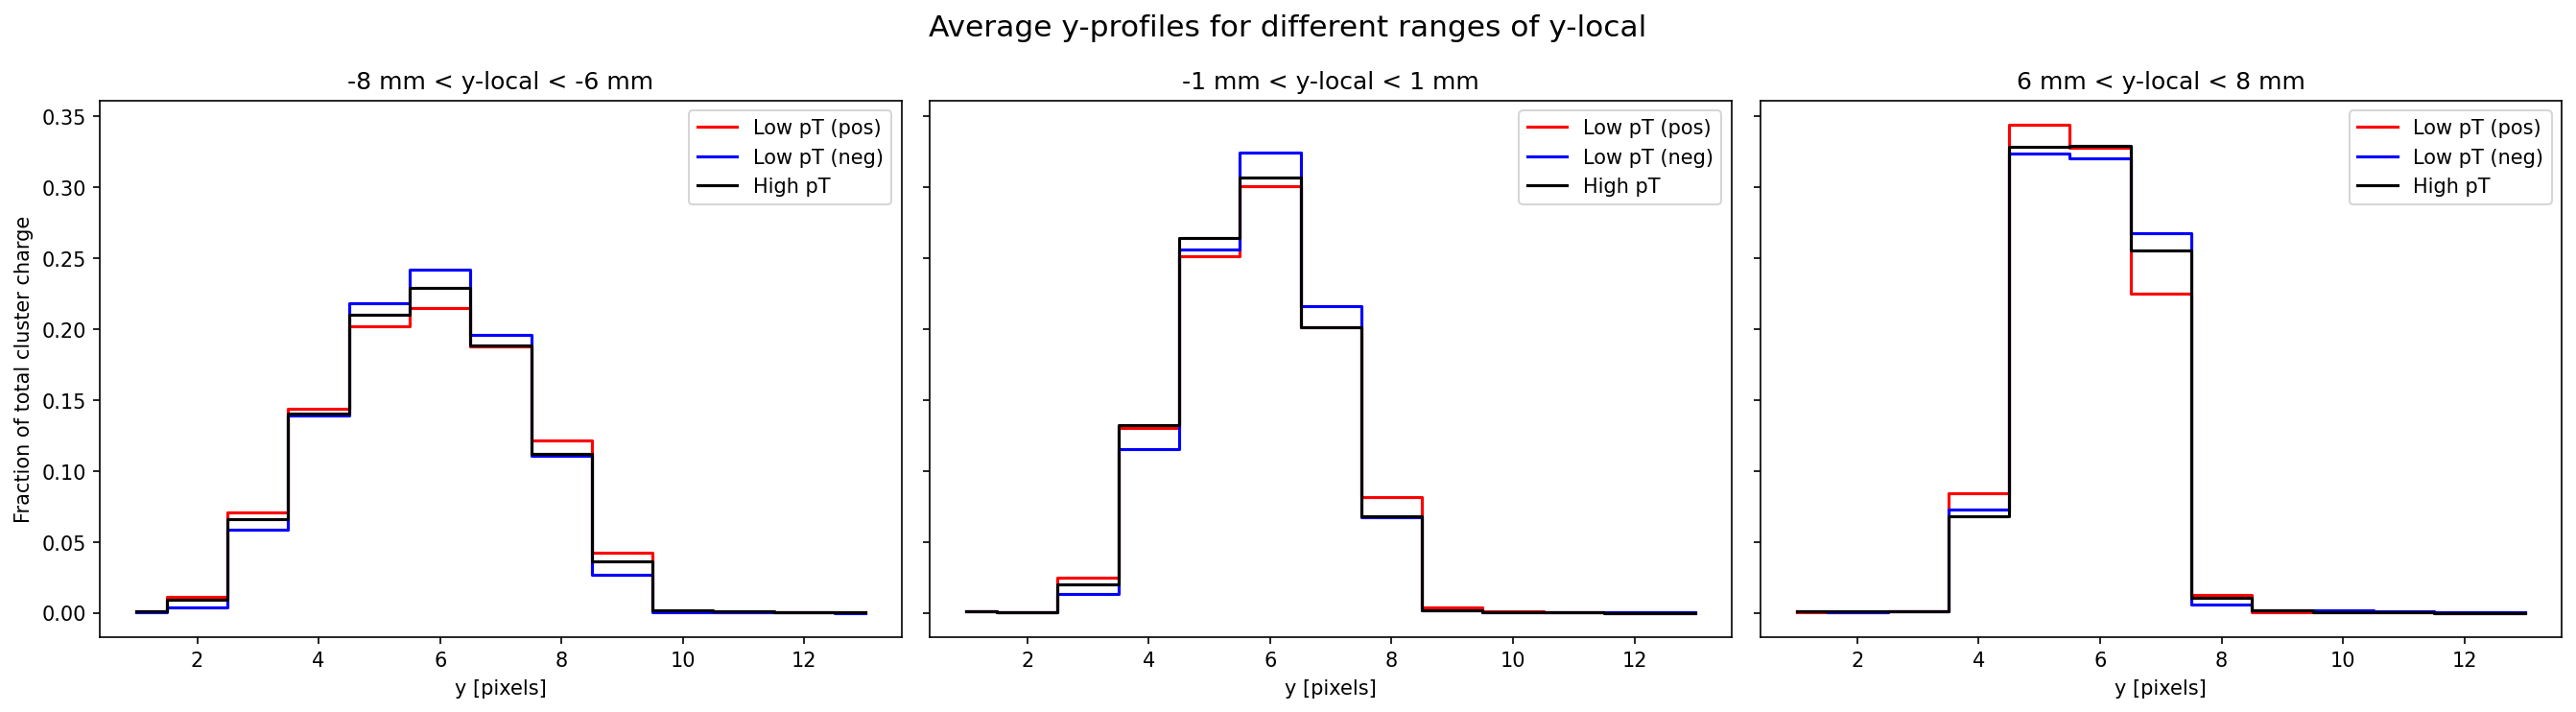

In [225]:
yaxis=np.arange(1,14,1)
fig, ax = plt.subplots(1,3, sharey=True, figsize=(18,5))
ax[0].step(yaxis,profileLowPos1, where="mid", label="Low pT (pos)", c ='r')
ax[0].step(yaxis,profileLowNeg1, where="mid", label="Low pT (neg)", c='b')
ax[0].step(yaxis,profileHigh1, where="mid", label="High pT", c='k')
ax[0].legend()
ax[0].set_title("-8 mm < y-local < -6 mm")
ax[0].set_ylabel("Fraction of total cluster charge")
ax[0].set_xlabel("y [pixels]")

ax[1].step(yaxis,profileLowPos3, where="mid", label="Low pT (pos)", c ='r')
ax[1].step(yaxis,profileLowNeg3, where="mid", label="Low pT (neg)", c='b')
ax[1].step(yaxis,profileHigh3, where="mid", label="High pT", c='k')
ax[1].legend()
ax[1].set_title("-1 mm < y-local < 1 mm")
ax[1].set_xlabel("y [pixels]")

ax[2].step(yaxis,profileLowPos2, where="mid", label="Low pT (pos)", c ='r')
ax[2].step(yaxis,profileLowNeg2, where="mid", label="Low pT (neg)", c='b')
ax[2].step(yaxis,profileHigh2, where="mid", label="High pT", c='k')
ax[2].legend()
ax[2].set_title("6 mm < y-local < 8 mm")
ax[2].set_xlabel("y [pixels]")

fig.suptitle('Average y-profiles for different ranges of y-local', fontsize=15)
plt.tight_layout()
plt.show()